In [ ]:
# default_exp first_layer_thickness_scan

#  First layer thickness scan
> Study the effect of the variation the first layer thickness on energy deposited in the sensor.

![image.png](media/layer_thickness_scan.png "Gate Simulation")

In [ ]:
#hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#hide
from ProtonBeamTherapy.macrotools import *
from ProtonBeamTherapy.analysis import *

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Beam energy 250 MeV

vary thickness of the first layer between 0.5 cm and 1.5 cm in 1 mm steps

In [ ]:
edep = []
th0 = np.linspace(0.5, 1.5, num=10)
for t in th0:
    # vary the thickness only for the 0th layer for the other 19 it will be 1 cm
    main_macro, output_root = create_all(phantom_layer_thickness=[t]+[1]*19) 
    run_macro(main_macro)
    root_hits_file = output_root['hits'][0]
    edep.append(get_edep_data(get_df_subentry2(root_hits_file), sensor=0))

Text(0.5, 0, 'keV')

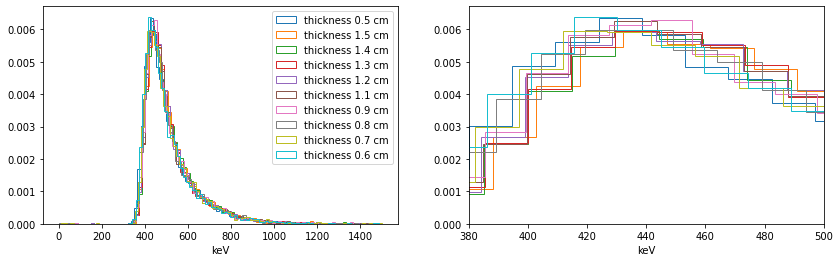

In [ ]:
fig0, (ax0, ax_0) = plt.subplots(1, 2, figsize=(14, 4))
for i in range(10):
    __ = ax0.hist(edep[-i][edep[-i]<1500], bins=100, histtype='step', density=True, 
                  label=f'thickness {round(th0[-i], 1)} cm')
ax0.set_xlabel('keV')
ax0.legend()
for i in range(10):
    __ = ax_0.hist(edep[-i][edep[-i]<1500], bins=100, histtype='step', density=True, 
                   label=f'thickness {round(th0[-i], 1)} cm')
ax_0.set_xlim((380, 500))
ax_0.set_xlabel('keV')

Landau has a small shift with thickness, but will need a larger statistics to say it definitevely

In [ ]:
m = np.array([np.mean(e) for e in edep])
em = np.array([stats.sem(e) for e in edep])
tm = np.array([stats.tmean(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep])
etm = np.array([stats.tsem(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep])

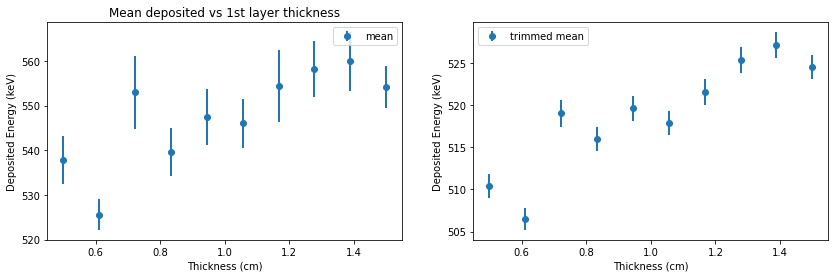

In [ ]:
fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 4))
ax2.errorbar(th0, tm, yerr=etm, fmt='o', lw=0, elinewidth=2, label='trimmed mean')
ax1.errorbar(th0, m, yerr=em, fmt='o', lw=0, elinewidth=2, label='mean')
ax1.set_title('Mean deposited vs 1st layer thickness')
ax1.set_xlabel('Thickness (cm)')
ax1.set_ylabel('Deposited Energy (keV)')
ax1.legend()
#ax2.set_xlim(173, 240)
#ax2.set_ylim(0, 0.01)
#ax2.scatter(th0, tm /etm, label='SNR for trimmed mean')
ax2.set_xlabel('Thickness (cm)')
ax2.set_ylabel('Deposited Energy (keV)')
ax2.legend()

## Beam energy 200 MeV

vary thickness of the first layer between 0.5 cm and 1.5 cm in 1 mm steps

In [ ]:
edep200 = []
th0_200 = np.linspace(0.5, 1.5, num=10)
for t in th0_200:
    # vary the thickness only for the 0th layer for the other 19 it will be 1 cm
    main_macro, output_root = create_all(beam_energy=200, phantom_layer_thickness=[t]+[1]*19) 
    run_macro(main_macro)
    root_hits_file = output_root['hits'][0]
    edep200.append(get_edep_data(get_df_subentry2(root_hits_file), sensor=0))

In [ ]:
m200 = np.array([np.mean(e) for e in edep200])
em200 = np.array([stats.sem(e) for e in edep200])
tm200 = np.array([stats.tmean(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep200])
etm200 = np.array([stats.tsem(e, limits=(0, np.mean(e) + 2 * np.std(e))) for e in edep200])

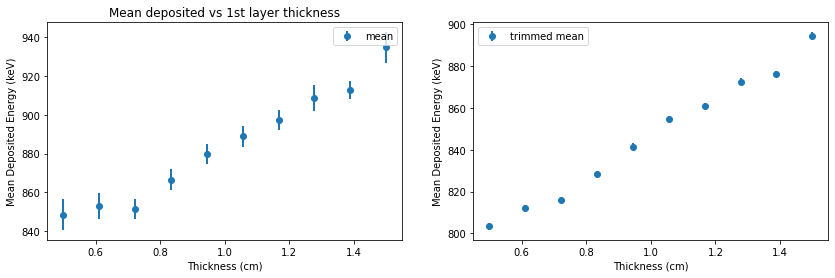

In [ ]:
fig2, (ax3, ax4) = plt.subplots(1,2,figsize=(14, 4))
ax4.errorbar(th0_200, tm200, yerr=etm200, fmt='o', lw=0, elinewidth=2, label='trimmed mean')
ax3.errorbar(th0_200, m200, yerr=em200, fmt='o', lw=0, elinewidth=2, label='mean')
ax3.set_title('Mean deposited vs 1st layer thickness')
ax3.set_xlabel('Thickness (cm)')
ax3.set_ylabel('Mean Deposited Energy (keV)')
ax3.legend()
#ax2.set_xlim(173, 240)
#ax2.set_ylim(0, 0.01)
#ax2.scatter(th0, tm /etm, label='SNR for trimmed mean')
ax4.set_xlabel('Thickness (cm)')
ax4.set_ylabel('Mean Deposited Energy (keV)')
ax4.legend()

## Max dose position versus thickness of the first layer
### Beam energy 100 MeV

In [ ]:
dose_array = []
dose_max = []
th0_100 = np.linspace(0.5, 1.5, num=10)
for t in th0_100:
    # vary the thickness only for the 1st layer for the other 19 it will be 1 cm (0th layer is air)
    main_macro, _, timestamp = create_all(beam_energy=100, phantom_layer_thickness=[1] +[t]+[1]*19)
    run_macro(main_macro)
    d = extract_dose(timestamp)
    dose_array.append(d)
    dose_max.append(d.argmax())

Text(0, 0.5, 'Dose (Gy)')

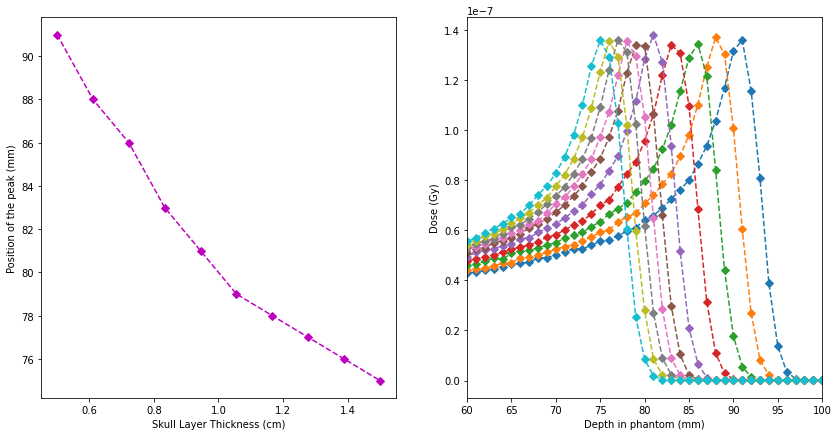

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].plot(th0_100, dose_max, 'D--m')
y = np.arange(len(dose_array[0]))
ax[1].plot(y, np.transpose(dose_array), 'D--')
ax[1].set_xlim(60,100)
ax[0].set_xlabel('Skull Layer Thickness (cm)')
ax[0].set_ylabel('Position of the peak (mm)')
ax[1].set_xlabel('Depth in phantom (mm)')
ax[1].set_ylabel('Dose (Gy)')

### Beam energy 70 MeV

In [ ]:
dose_array_70 = []
dose_max_70 = []
th1_70 = np.linspace(0.5, 1.5, num=10)
for t in th1_70:
    # vary the thickness only for the 1st layer for the other 19 it will be 1 cm (0th layer is air)
    main_macro, _, timestamp = create_all(beam_energy=70, phantom_layer_thickness=[1] +[t]+[1]*19)
    run_macro(main_macro)
    d = extract_dose(timestamp)
    dose_array_70.append(d)
    dose_max_70.append(d.argmax())

Text(0, 0.5, 'Dose (Gy)')

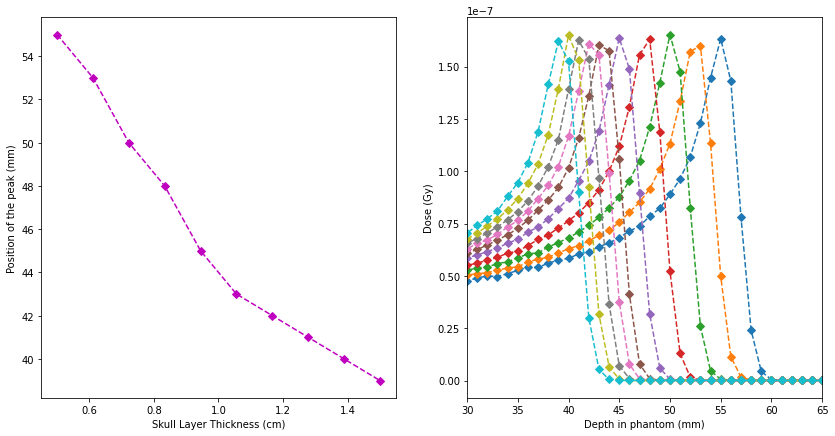

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].plot(th1_70, dose_max_70, 'D--m')
y = np.arange(len(dose_array_70[0]))
ax[1].plot(y, np.transpose(dose_array_70), 'D--')
ax[1].set_xlim(30,65)
ax[0].set_xlabel('Skull Layer Thickness (cm)')
ax[0].set_ylabel('Position of the peak (mm)')
ax[1].set_xlabel('Depth in phantom (mm)')
ax[1].set_ylabel('Dose (Gy)')

In [ ]:
edep200_all = pd.DataFrame(index=np.linspace(0.5, 1.5, num=11), columns=[f'sensor_{i}' for i in range(10)])
th0_200 = np.linspace(0.5, 1.5, num=11)
n_sensors = 10
timestamps = []
for t in edep200_all.index:
    # vary the thickness only for the 1st layer for the other 19 it will be 1 cm, 0th layer is air
    main_macro, output_root, timestamp = create_all(beam_energy=200, phantom_layer_thickness=[1] + [t]+[1]*19, n_sensors=n_sensors) 
    timestamps.append(timestamp)
    run_macro(main_macro)
    root_hits_file = output_root['hits'][0]
    for i in range(n_sensors):
        df = get_df_subentry2(root_hits_file)
        edep200_all.loc[t][f'sensor_{i}'] = get_edep_data(df, sensor=i)

In [ ]:
edep200_all.loc[t][f'sensor_{i}'] = get_edep_data(df, sensor=i)

In [ ]:
def tmean(e):
    return stats.tmean(e, limits=(0, np.mean(e) + 2 * np.std(e)))

In [ ]:
mean_e_200 = edep200_all.applymap(tmean)

<AxesSubplot:>

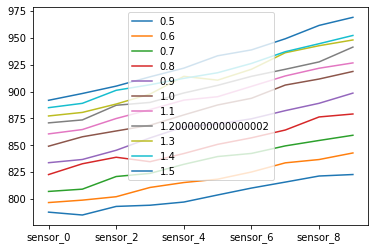

In [ ]:
plt.subplot()
mean_e_200.transpose()

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_macrotools.ipynb.
Converted 01_analysis.ipynb.
Converted 02_scanners.ipynb.
Converted 20_analysis0.ipynb.
Converted 21_analysis1.ipynb.
Converted index.ipynb.
